### Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, solve
import itertools
import yfinance as yf
from sklearn.linear_model import LinearRegression
import math

In [6]:
indexes = yf.download("TSLA KO V SHEL", start="2011-01-01", end="2022-01-01")

[*********************100%***********************]  4 of 4 completed


# Test af 'Adj Close' pct_change() giver procentvis ændring

In [42]:
returns =  indexes['Adj Close']
returns_ffill = indexes['Adj Close'].resample('y').ffill()
returns_ffill

,KO,SHEL,TSLA,V
Date,,,,
2011-12-31,24.652576,40.026295,1.904000,23.441568
2012-12-31,26.261791,39.662590,2.258000,35.271816
2013-12-31,30.787483,43.247238,10.028667,52.222176
2014-12-31,32.408794,42.700188,14.827333,61.954193
2015-12-31,34.074558,31.119593,16.000668,73.810593
2016-12-31,33.952881,39.913860,14.246000,74.822685
2017-12-31,38.836006,52.296314,20.756666,110.121429
2018-12-31,41.466545,48.367165,22.186666,128.277771
2019-12-31,50.008430,52.095539,27.888666,183.856720


In [16]:
returns_np = returns.to_numpy()
returns_np

array([[ 22.33393669,  35.03116989,   1.77466702,  16.15329933],
       [ 21.87164116,  35.22961807,   1.778     ,  16.17161942],
       [ 21.74150658,  34.91106796,   1.78866696,  16.5129261 ],
       ...,
       [ 56.82022095,  42.12561035, 362.06332397, 216.10876465],
       [ 56.65635681,  41.85557556, 356.77999878, 215.81159973],
       [ 57.0708313 ,  41.85557556, 352.26000977, 214.6625824 ]])

In [19]:
returns_np[:,0]

array([22.33393669, 21.87164116, 21.74150658, ..., 56.82022095,
       56.65635681, 57.0708313 ])

In [24]:
result_array = np.empty_like(returns_np)
print(np.shape(returns_np))
print(np.shape(result_array))

(2769, 4)
(2769, 4)


In [26]:
x,y = np.shape(result_array)
print(x)
print(y)

2769
4


In [27]:
test = np.delete(returns_np, 0, 0)
test

array([[ 21.87164116,  35.22961807,   1.778     ,  16.17161942],
       [ 21.74150658,  34.91106796,   1.78866696,  16.5129261 ],
       [ 21.58398056,  34.33137894,   1.85866702,  16.7603054 ],
       ...,
       [ 56.82022095,  42.12561035, 362.06332397, 216.10876465],
       [ 56.65635681,  41.85557556, 356.77999878, 215.81159973],
       [ 57.0708313 ,  41.85557556, 352.26000977, 214.6625824 ]])

In [33]:
def calc_percent(x):
    result_array = np.empty_like(x)
    result_array = np.delete(result_array, 0, 0)
    
    rows, col = np.shape(x)
    
    for i in range(col):
        for j in range(rows-1):
            increase = x[j+1,i]-x[j,i]
            pct_change = (increase/x[j,i])
            result_array[j,i] = pct_change
    
    return result_array

In [34]:
print(calc_percent(returns_np))

[[-0.02069924  0.0056649   0.00187808  0.00113414]
 [-0.00594992 -0.00904211  0.00599942  0.02110529]
 [-0.0072454  -0.01660473  0.03913532  0.01498095]
 ...
 [ 0.00118878 -0.00772374 -0.00209471  0.00055019]
 [-0.00288391 -0.00641023 -0.01459227 -0.00137507]
 [ 0.00731559  0.         -0.01266884 -0.00532417]]


In [35]:
returns_pct = returns.pct_change()
returns_pct = returns_pct[1:]
returns_pct_np = returns_pct.to_numpy()
returns_pct

,KO,SHEL,TSLA,V
Date,,,,
2011-01-04,-0.020699,0.005665,0.001878,0.001134
2011-01-05,-0.005950,-0.009042,0.005999,0.021105
2011-01-06,-0.007245,-0.016605,0.039135,0.014981
2011-01-07,-0.001745,0.000152,0.012912,-0.002870
2011-01-10,0.002225,0.012928,0.007436,-0.015762
...,...,...,...,...
2021-12-27,0.007386,0.011177,0.025248,0.004663
2021-12-28,0.003922,-0.006993,-0.005000,0.001930
2021-12-29,0.001189,-0.007724,-0.002095,0.000550


In [39]:
np.allclose(calc_percent(returns_np),returns_pct_np)

True

In [43]:
returns_ffill_np = returns_ffill.to_numpy()
returns_ffill_np

array([[ 24.65257645,  40.02629471,   1.90400004,  23.44156837],
       [ 26.26179123,  39.66259003,   2.2579999 ,  35.27181625],
       [ 30.78748322,  43.24723816,  10.02866745,  52.2221756 ],
       [ 32.4087944 ,  42.70018768,  14.82733345,  61.95419312],
       [ 34.07455826,  31.11959267,  16.00066757,  73.81059265],
       [ 33.95288086,  39.91386032,  14.24600029,  74.82268524],
       [ 38.83600616,  52.29631424,  20.75666618, 110.12142944],
       [ 41.4665451 ,  48.36716461,  22.18666649, 128.277771  ],
       [ 50.00843048,  52.09553909,  27.88866615, 183.85671997],
       [ 51.24320221,  32.59135056, 235.22332764, 215.34074402],
       [ 57.0708313 ,  41.85557556, 352.26000977, 214.6625824 ]])

In [46]:
returns_ffill_pct = returns_ffill.pct_change()
#display(returns_ffill_pct)
returns_ffill_pct = returns_ffill_pct[1:]
#returns_ffill_pct

In [47]:
np.allclose(calc_percent(returns_ffill_np),returns_ffill_pct.to_numpy())

True

### Middelværdi formel

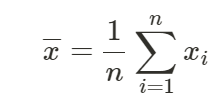

In [3]:
returns = indexes['Adj Close'].resample('y').ffill().pct_change()
returns

,KO,SHEL,TSLA,V
Date,,,,
2011-12-31 00:00:00-05:00,NaN,NaN,NaN,NaN
2012-12-31 00:00:00-05:00,0.065276,-0.009087,0.185924,0.504669
2013-12-31 00:00:00-05:00,0.172331,0.090379,3.441394,0.480564
2014-12-31 00:00:00-05:00,0.052661,-0.012650,0.478495,0.186358
2015-12-31 00:00:00-05:00,0.051399,-0.271207,0.079133,0.191374
2016-12-31 00:00:00-05:00,-0.003571,0.282596,-0.109662,0.013712
2017-12-31 00:00:00-05:00,0.143821,0.310230,0.457017,0.471765
2018-12-31 00:00:00-05:00,0.067735,-0.075133,0.068894,0.164876
2019-12-31 00:00:00-05:00,0.205994,0.077085,0.257001,0.433270


In [4]:
returns = returns[1:]
returns

,KO,SHEL,TSLA,V
Date,,,,
2012-12-31 00:00:00-05:00,0.065276,-0.009087,0.185924,0.504669
2013-12-31 00:00:00-05:00,0.172331,0.090379,3.441394,0.480564
2014-12-31 00:00:00-05:00,0.052661,-0.012650,0.478495,0.186358
2015-12-31 00:00:00-05:00,0.051399,-0.271207,0.079133,0.191374
2016-12-31 00:00:00-05:00,-0.003571,0.282596,-0.109662,0.013712
2017-12-31 00:00:00-05:00,0.143821,0.310230,0.457017,0.471765
2018-12-31 00:00:00-05:00,0.067735,-0.075133,0.068894,0.164876
2019-12-31 00:00:00-05:00,0.205994,0.077085,0.257001,0.433270
2020-12-31 00:00:00-05:00,0.024691,-0.374393,7.434370,0.171242


### Test af numpy cov() og mean() Middelværdi

In [5]:
returns = indexes['Adj Close'].resample('y').ffill().pct_change()
returns = returns[1:]
returns

,KO,SHEL,TSLA,V
Date,,,,
2012-12-31 00:00:00-05:00,0.065276,-0.009087,0.185924,0.504669
2013-12-31 00:00:00-05:00,0.172331,0.090379,3.441394,0.480564
2014-12-31 00:00:00-05:00,0.052661,-0.012650,0.478495,0.186358
2015-12-31 00:00:00-05:00,0.051399,-0.271207,0.079133,0.191374
2016-12-31 00:00:00-05:00,-0.003571,0.282596,-0.109662,0.013712
2017-12-31 00:00:00-05:00,0.143821,0.310230,0.457017,0.471765
2018-12-31 00:00:00-05:00,0.067735,-0.075133,0.068894,0.164876
2019-12-31 00:00:00-05:00,0.205994,0.077085,0.257001,0.433270
2020-12-31 00:00:00-05:00,0.024691,-0.374393,7.434370,0.171242


In [6]:
returns.mean()

KO      0.084042
SHEL    0.044219
TSLA    1.152410
V       0.241667
dtype: float64

In [7]:
np_returns = returns.to_numpy()
np_returns

array([[ 6.52756520e-02, -9.08664550e-03,  1.85924288e-01,
         5.04669355e-01],
       [ 1.72330511e-01,  9.03788750e-02,  3.44139411e+00,
         4.80563997e-01],
       [ 5.26608594e-02, -1.26496372e-02,  4.78494877e-01,
         1.86357803e-01],
       [ 5.13985195e-02, -2.71207260e-01,  7.91331850e-02,
         1.91373911e-01],
       [-3.57125265e-03,  2.82596074e-01, -1.09662130e-01,
         1.37121256e-02],
       [ 1.43821049e-01,  3.10229579e-01,  4.57017111e-01,
         4.71764867e-01],
       [ 6.77348395e-02, -7.51325172e-02,  6.88935445e-02,
         1.64876001e-01],
       [ 2.05994402e-01,  7.70849173e-02,  2.57001189e-01,
         4.33269964e-01],
       [ 2.46913477e-02, -3.74392635e-01,  7.43436995e+00,
         1.71242089e-01],
       [ 1.13724689e-01,  2.84254100e-01,  4.97555592e-01,
        -3.14924922e-03],
       [ 3.04002988e-02,  1.84331785e-01, -1.13609318e-01,
         4.36528646e-02]])

In [8]:
np_returns[1,0]

0.17233051099810148

In [9]:
a,b = np.shape(np_returns)
print(a)
print(b)

11
4


In [10]:
test = np.zeros((1,4))
test

array([[0., 0., 0., 0.]])

In [11]:
test[0,1]

0.0

In [12]:
def mean_value(x):
    """ Takes a dataframe x as input, assuming columns are indexes and rows are values
    Returns a columns vector of mean values for each index
    """
    rows, columns = np.shape(x)
    mean_matrix = np.zeros(columns)
    
    x = x.to_numpy()
    for i in range(columns):
        result = 0
        for j in range(rows):
            result += x[j,i]
        result = result*(1/rows)
        
        mean_matrix[i] = result
    
    return mean_matrix

In [13]:
mean_value(returns)

array([0.0840419 , 0.04421879, 1.15241022, 0.2416667 ])

In [14]:
returns.mean()

KO      0.084042
SHEL    0.044219
TSLA    1.152410
V       0.241667
dtype: float64

In [15]:
test1 = returns.mean().to_numpy()
test1

array([0.0840419 , 0.04421879, 1.15241022, 0.2416667 ])

In [16]:
test2 = mean_value(returns)
test2

array([0.0840419 , 0.04421879, 1.15241022, 0.2416667 ])

In [17]:
for i in range(len(test1)):
    print(math.isclose(test1[i], test2[i]))

True
True
True
True


#### Covariance matrix

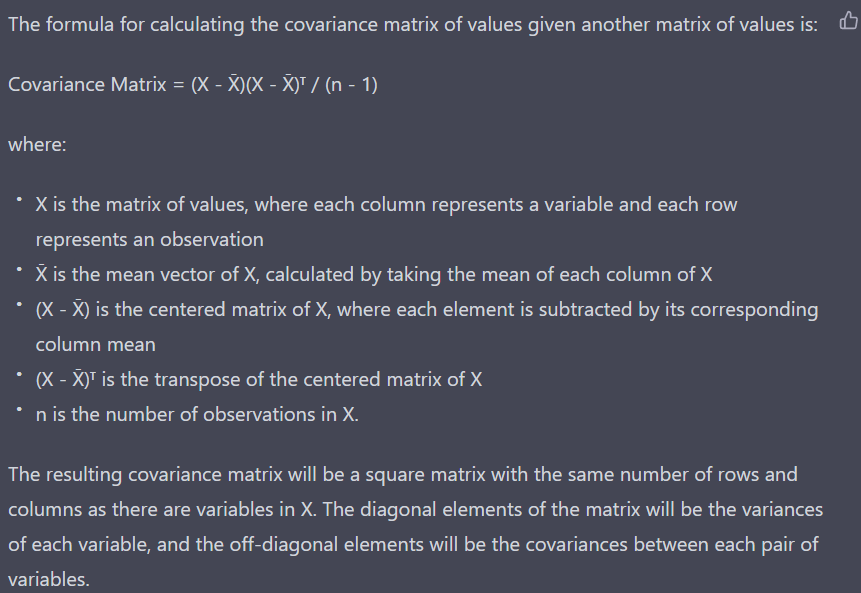

In [18]:
def cov_matrix(stock_prices):
    """Takes an numpy array of prices as input then calculates the covariance matrix between the columns
       Returns a covariance matrix between the columns
    """
    
    # Calculate the mean of each stock
    means = np.mean(stock_prices, axis=0)
    
    # Center the data by subtracting the mean from each data point
    centered_data = stock_prices - means
    
    # Calculate the covariance matrix
    covariance_matrix = np.dot(centered_data.T, centered_data) / (centered_data.shape[0] - 1)
    
    return covariance_matrix

In [19]:
manualcov = cov_matrix(returns.to_numpy())

In [20]:
pdcov = returns.cov()

In [21]:
np.allclose(manualcov,pdcov)

True